# Gradient Descent for Ordinary Least Squares

## Problem Statement

### Ordinary Least Squares Regression
Assume we have a dataset $\mathcal{D} = \{(x_i, y_i): i=1,\ldots,N\}$ consisting of $N$ pairs $(x,\, y)$ with $x\in \mathbb{R}$ and
$$
y \sim \mathrm{Normal}(\mu x+ \beta, \sigma)
$$
for _unknown_ parameters $\mu$, $\beta$, and $\sigma$.

We wish to find a linear estimator for the mean of the form
$$
\hat y = m x + b
$$

Our goal is to find the values of $m$ and $b$ that _best_ explain the observed data $\mathcal D$.

We will do this by minimizing the Ordinary Least Squares objective:
$$
J_\mathrm{OLS}(m,b) = \sum_{i=1}^N (y_i - (m x_i + b))^2
$$
$$
(m^*, b^*) = \mathrm{argmin}_{(m,b)} J_\mathrm{OLS}(m,b)
$$

We will discuss this model in more detail later in the course. For now, the goal is to implement the gradient descent algorithm in pure python (no `numpy` or other libraries outside of the standard library) to find the optimal values of $m$ and $b$.

### Gradient Descent
Gradient descent iteratively finds the optimal values of $m$ and $b$ by updating them in the direction of the negative gradient of the objective function. The process begins with a random initialization for $m$ and $b$ and then proceeds by iteratively moving "downhill" until convergence. The update rules for $m$ and $b$ are given by:
$$
m \leftarrow m - \alpha \frac{\partial J_\mathrm{OLS}}{\partial m}
$$
$$
b \leftarrow b - \alpha \frac{\partial J_\mathrm{OLS}}{\partial b}
$$
where $\alpha$ is the learning rate. The partial derivatives are given by:

$$
\frac{\partial J_\mathrm{OLS}}{\partial m} = -2 \sum_{i=1}^N (y_i - (m x_i + b)) x_i
$$

$$
\frac{\partial J_\mathrm{OLS}}{\partial b} = -2 \sum_{i=1}^N (y_i - (m x_i + b))
$$

### Your task
In the next cell, we have declared two variables `x` and `y` which represent the input features and target values respectively. In other words the python tuple `(x[i], y[i])` represents the $i$-th example $(x_i, y_i) \in \mathcal{D}$.

Your task is to implement the gradient descent algorithm using these variables to find the optimal values of `m` and `b`.


Number of samples: 150


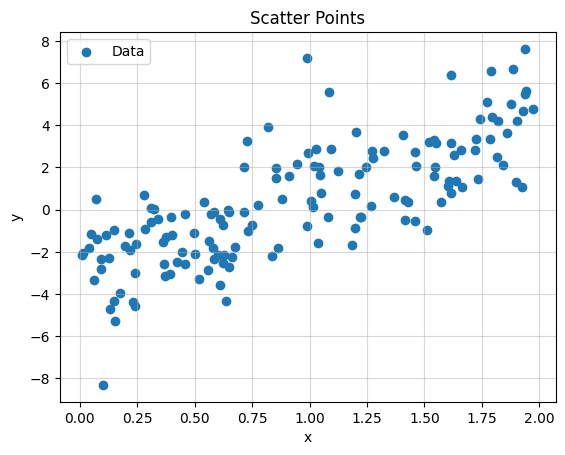

In [22]:

x = [0.749080237694725, 1.9014286128198323, 1.4639878836228102, 1.1973169683940732, 0.31203728088487304, 0.3119890406724053, 0.11616722433639892, 1.7323522915498704, 1.2022300234864176, 1.416145155592091, 0.041168988591604894, 1.9398197043239886, 1.6648852816008435, 0.4246782213565523, 0.36364993441420124, 0.36680901970686763, 0.6084844859190754, 1.0495128632644757, 0.8638900372842315, 0.5824582803960838, 1.223705789444759, 0.27898772130408367, 0.5842892970704363, 0.7327236865873834, 0.9121399684340719, 1.5703519227860272, 0.39934756431671947, 1.0284688768272232, 1.184829137724085, 0.09290082543999545, 1.2150897038028767, 0.34104824737458306, 0.13010318597055903, 1.8977710745066665, 1.9312640661491187, 1.6167946962329223, 0.6092275383467414, 0.19534422801276774, 1.3684660530243138, 0.8803049874792026, 0.24407646968955765, 0.9903538202225404, 0.06877704223043679, 1.8186408041575641, 0.5175599632000338, 1.325044568707964, 0.6234221521788219, 1.0401360423556216, 1.0934205586865593, 0.3697089110510541, 1.9391692555291171, 1.550265646722229, 1.8789978831283782, 1.7896547008552977, 1.1957999576221703, 1.8437484700462337, 0.176985004103839, 0.3919657248382904, 0.09045457782107613, 0.6506606615265287, 0.777354579378964, 0.5426980635477918, 1.6574750183038587, 0.7135066533871786, 0.5618690193747615, 1.085392166316497, 0.2818484499495253, 1.6043939615080793, 0.14910128735954165, 1.9737738732010346, 1.5444895385933148, 0.3974313630683448, 0.011044234247204798, 1.6309228569096683, 1.4137146876952342, 1.4580143360819746, 1.5425406933718915, 0.14808930346818072, 0.7169314570885452, 0.23173811905025943, 1.726206851751187, 1.2465962536551158, 0.6617960497052984, 0.12711670057204727, 0.6219646434313244, 0.6503666440534941, 1.4592123566761281, 1.2751149427104262, 1.774425485152653, 0.9444298503238986, 0.2391884918766034, 1.42648957444599, 1.5215700972337949, 1.1225543951389925, 1.541934359909122, 0.9875911927287815, 1.0454656587639881, 0.8550820367170993, 0.05083825348819038, 0.2157828539866089, 0.0628583713734685, 1.2728208225275608, 0.6287119621526533, 1.0171413823294055, 1.815132947852186, 0.4985844582977499, 0.8207658460712595, 1.5111022770860973, 0.4575963309832449, 0.15395981965758598, 0.579502905827536, 0.32244257450800884, 1.8593953046851461, 1.616240759128834, 1.266807513020847, 1.7429211803754354, 1.607344153798229, 0.3731401177720717, 1.7851179969799555, 1.0786844838313014, 1.614880310328125, 1.7921825998469865, 0.6360069499437278, 0.22010384905535352, 0.45587032508388337, 0.8542155772525126, 1.6360295318449862, 1.7214611665126869, 0.013904261062381407, 1.0214946051551315, 0.834822006297558, 0.4442156209414605, 0.2397307346673656, 0.6752303428072559, 1.8858194078250383, 0.6464058640415105, 1.0375812434867322, 1.4060379177903557, 0.727259204758588, 1.9435641654419213, 1.9248945898842225, 0.5035645916507283, 0.9944970117847709, 0.6017566196335393, 0.5696809887549352, 0.07377389470906559, 1.2191286679597937, 1.005358046457723, 0.1029575024999787, 0.5572929284732229]

y = [-0.7148508564354272, 4.182707993953235, 2.06321199569566, -0.8545771764549248, 0.0920704084983417, -0.5921555504447269, -1.2091088074972718, 1.471804974533753, 3.662695126340635, -0.496731315314173, -1.8289086257789098, 7.6226663103014225, 1.0936599166242473, -2.504647252056918, -1.5528353406469235, -2.597250825729312, -3.5839653036489683, 0.7932802273362126, -1.835416368525873, -0.132609265002139, -0.32602214685249975, 0.6888422333449875, -2.325680721841888, -0.9990747503040903, 1.6161450199161733, 0.3422191759916733, -1.2042286393342554, 2.8871408888895305, -1.666193678447851, -2.351737858528484, 1.70760885324481, -0.4381411085786666, -4.709302593139687, 1.3313996878758494, 4.672821971351486, 3.1785046149733036, -0.429341127681121, -1.7100108353356054, 0.5995879228227394, 0.4875114262089651, -1.6328555278138563, -0.7838766107672523, 0.5058250423098527, 4.194450426147103, -3.2733212489045167, 2.7866248055870755, -2.523715390271936, 2.0178742047939666, 2.8545142186659147, -3.142212868436804, 5.473000620529473, 3.148296385666674, 5.015097870939682, 6.58317917263795, 0.7558706486725724, 2.1340813575362114, -3.9372027374812295, -3.0557879617555006, -2.8183369691009155, -0.12567172872802357, 0.20494992665390732, 0.3470139082303132, 2.8239158748498423, 2.0409579218804295, -1.496607890354758, 5.559168623639572, -0.9186125665879004, 1.1153531415497828, -4.3522073658485505, 4.752535282879196, 2.014653510756363, -0.35948936459963243, -2.1331793371310797, 2.5807794020343118, 0.4661124003136108, -0.5479324669133523, 1.617491260684333, -0.982989547795291, -0.11607584796223491, -4.368959446070071, 3.3447906013687234, 2.037392302318369, -2.2304643393834382, -2.286072612593161, -0.7212584907098648, -2.7239147670163613, 2.7333711289759446, 2.444275220630902, 5.105828873591021, 2.149658067194725, -4.573761672356797, 0.3515196907095004, 3.2268070579334367, 1.828065797082839, 3.2981037107175104, 7.1988492831964965, 1.6581881993870005, 1.9800269988258956, -1.1525630266782296, -1.104825321261722, -3.3317168783134647, 2.783069014709681, -2.151952257906464, 0.14556227635790364, 2.50357910878172, -1.111674652031811, 3.9233329529280487, -0.9788561172342187, -0.19745750840324394, -5.283393405780339, -1.7976205947351325, 0.034212555470921835, 3.6203735998150717, 0.7707892955746329, 0.18204480436801984, 4.289520191949706, 1.3475629327888121, -1.315207056029293, 3.327663709261518, -0.36490491490062427, 6.403983242467758, 4.381997388520972, -4.317975201847766, -1.9033414774597646, -2.562580175551087, 1.4815128562771862, 1.3391920692002255, 2.8243253102273314, -2.067607348065865, 2.0903027078406726, -2.1786416903061556, -2.030622489426548, -2.992096723195894, -1.7800199571786, 6.689912847879553, -0.028861481673041034, -1.5750125678827667, 3.527391119612103, 3.2591805614271663, 5.609288785011231, 1.0782336241752555, -2.084933556738391, 2.6978340523232878, -2.1322733961154787, -0.2294325401018269, -1.3861817750169307, -0.3551779874023673, 0.4145837894938802, -8.311866586370952, -2.8421531226787273]

assert len(x) == len(y), "x and y must have the same length"

# N is the number of samples / data points
N = len(x)

print("Number of samples:", N)

# Plot the data
import matplotlib.pyplot as plt

plt.scatter(x, y,label="Data")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Scatter Points")
plt.grid(alpha = 0.5)
plt.legend()

## Implement gradient descent by using the following steps:

1. Initialize $m$ and $b$ (can use [the `randrange` function](https://docs.python.org/3/library/random.html#random.randrange) included in the `random` library, which is included in the python standard library)
2. Define the learning rate ($\alpha = 0.003$) and the number of iterations to 50.
3. Define empty lists to store the values of $J_\mathrm{OLS}$ and the weights at each iteration.
4. For each iteration:
   
   1. Compute the predictions $\hat y$ using the current parameter values.
   3. Compute the partial derivatives of $J_\mathrm{OLS}$ with respect to $m$ and $b$.
   4. Use the update rules to update $m$ and $b$:
      - $m \leftarrow m - \alpha \frac{\partial J_\mathrm{OLS}}{\partial m}$
      - $b \leftarrow b - \alpha \frac{\partial J_\mathrm{OLS}}{\partial b}$
      
      Append the updated values of $m$ and $b$ to their respective lists.
   5. Calculate $J_\mathrm{OLS}$ and append to list
5. Print the final values of
    - $J_\mathrm{OLS}$
    - $m$
    - $b$

In [28]:
import random
random.seed(42)

# your solution here:
b=random.randrange(-10, 10, 1)
m=random.randrange(-10, 10, 1)
a=0.003
maxit=50

xmin=min(x)
xmax=max(x)

djdm=lambda m,b:-2*sum([(y[i]-(m*x[i]+b))*x[i] for i in range(N)])
djdb=lambda m,b:-2*sum([(y[i]-(m*x[i]+b)) for i in range(N)])
jols=lambda m,b:sum([(y[i]-(m*x[i]+b))**2 for i in range(N)])
dom=lambda min,max:[min+i*(max-min)/N for i in range(N)]
yhat=lambda dom,m,b:[m*dom[i]+b for i in range(N)]

mlist=[]
blist=[]
jlist=[]
ylist=[]

for i in range(maxit):
    m=m-a*djdm(m,b)
    b=b-a*djdb(m,b)
    jlist.append(jols(m,b))
    mlist.append(m)
    blist.append(b)
    ylist.append(("yhat=",m,"x+",b))

print("J_Ols=",jlist[-1],"m=",mlist[-1],"b=",blist[-1])
print(ylist[-1])
print("I did store every yhat formula in the ylist list. I just showed the last yhat formula.")


J_Ols= 484.6215136902406 m= 3.653043882470206 b= -3.062743573034424
('yhat=', 3.653043882470206, 'x+', -3.062743573034424)
I did store every yhat formula in the ylist list. I just showed the last yhat formula.


## Visualize the results.

This section has you generate 3 diagnostic plots.

### Training curve
Use matplotlib to plot $J_\mathrm{OLS}$ as a function of the iteration. The y-axis should represent the value of $J_\mathrm{OLS}$, while the x-axis should represent the iteration number.
You can use [`plt.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) with appropriate arguments.

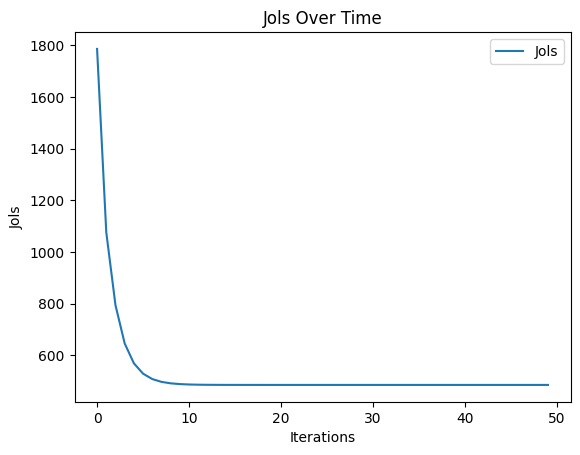

In [23]:
import matplotlib.pyplot as plt

# your solution here:
its=range(maxit)
plt.plot(its,jlist,label="Jols")
plt.xlabel('Iterations')
plt.ylabel('Jols')
plt.title("Jols Over Time")
plt.legend()


### Parameter trajectory
Also plot the trajectory of $(m,\,b)$ over the iterations. The y axis should represent the value of $m$ and the x axis should represent the value of $b$. You can also use `plt.plot()` to create this plot. You should connect the dots with lines in order to make the trajectory clear.

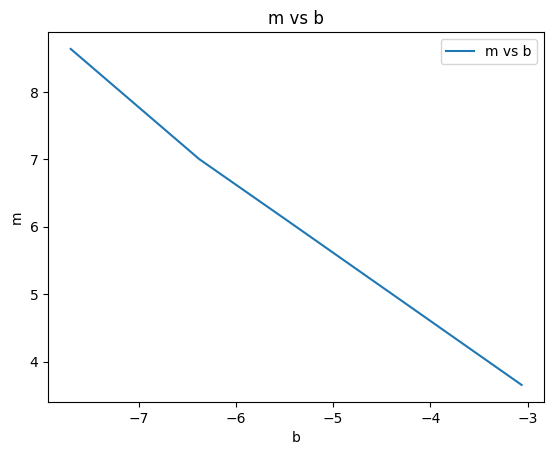

In [25]:
# your solution here:
plt.plot(blist,mlist,label="m vs b")
plt.xlabel('b')
plt.ylabel('m')
plt.title("m vs b")
plt.legend()

### Fit line

Create a plot that shows the original data points and the fitted line defined by the final values of $m$ and $b$.

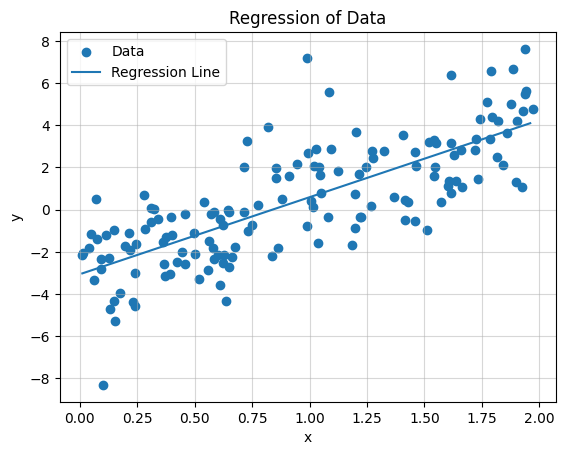

In [29]:
# your solution here:
domain=dom(xmin,xmax)
yhatp=yhat(domain,m,b)
plt.scatter(x, y,label="Data")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(alpha = 0.5)
plt.plot(domain,yhatp,label="Regression Line")
plt.title("Regression of Data")
plt.legend()

## Bonus (+10% to a total of 100% on assignment)

Compute the values of $m$ and $b$ in closed form and compare with the values obtained via gradient descent.

Let $Y$ be the vector of $y$ values and $X$ be the design matrix. We want to find a vector $u=[b,m]^T$ that is unbiased and minimize the variance of the estimator. Let

  $u=a^T Y$

  Where we enforce the unbiasedness

  $E[u]=a^TX\beta=\beta\Rightarrow a^TX=I$

  It follows that the Lagrangian of the function is

  $\mathscr{L}=\sigma^2 a^Ta-(a^TX-I)\lambda$

  By setting the gradiant equal to $0$,

  $\frac{\partial \mathscr{L}}{\partial a}=0\Rightarrow a=\frac{X\lambda}{2\sigma^2}\quad\frac{\partial \mathscr{L}}{\partial \lambda}=0\Rightarrow a^TX=I$

  Thus

  $\frac{\lambda^TX^TX}{2\sigma^2}=I\Rightarrow\lambda^T=2\sigma^2(X^TX)^{-1}\Rightarrow a=X(X^TX)^{-T}\Rightarrow u=(X^TX)^{-1}X^TY$

  For our desgin matrix,

  $m=\frac{\sum_1^N(x_i-\bar{x})y_i}{\sum_1^N(x_i-\bar{x})^2}\quad \text{ and }\quad b=\bar{Y}-m\bar{x}$

  Where $\bar{Y}$ and $\bar{x}$ are the average of the respective vectors

In [10]:
# your solution here:
xbar=sum(x)/N
ybar=sum(y)/N

b1=sum([(x[i]-xbar)*y[i] for i in range(N)])/sum([(x[i]-xbar)**2 for i in range(N)])
b0=ybar-xbar*b1

print("|b-b0|=",abs(b-b0)," |m-b1|=",abs(b1-m))

|b-b0|= 5.238338687263422e-07  |m-b1|= 5.301263459323025e-07
